In [56]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from ipywidgets import widgets, interact
import re
import io
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# เหตุผลที่ย้ายถิ่นฐาน

In [57]:
# import ข้อมูลและเพิ่มคอลัมเพื่อระบุปี
reasons_63 = pd.read_csv('https://github.com/Zylink2/Machine_Learning_Project_2/raw/main/files/%E0%B9%80%E0%B8%AB%E0%B8%95%E0%B8%B8%E0%B8%9C%E0%B8%A5%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%A2%E0%B9%89%E0%B8%B2%E0%B8%A2%E0%B8%96%E0%B8%B4%E0%B9%88%E0%B8%99_63.csv')
reasons_63["Year"] = "2563"
# ข้อมูลจำนวนคนไม่สะท้อนความเป็นจริงมีการแสดงจุดทศนิยม จึงต้องมีการแก้ไขความถูกต้อง
reasons_63[["กรุงเทพมหานคร","กลาง","เหนือ","ตะวันออกเฉียงเหนือ","ใต้"]] = reasons_63[["กรุงเทพมหานคร","กลาง","เหนือ","ตะวันออกเฉียงเหนือ","ใต้"]].round()
reasons_63

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,หางานทำ,16098.0,34475.0,9882.0,15859.0,8642.0,2563
1,ต้องการเปลี่ยนงาน,2649.0,15823.0,5193.0,6530.0,2058.0,2563
2,ต้องการรายได้เพิ่มขึ้น,2018.0,7801.0,2879.0,535.0,197.0,2563
3,หน้าที่การงาน,4064.0,26682.0,10324.0,2552.0,7836.0,2563
4,ศึกษาต่อ,497.0,3951.0,3561.0,2094.0,2488.0,2563
5,ย้ายที่อยู่อาศัย,1567.0,50846.0,5822.0,11727.0,14673.0,2563
6,กลับภูมิลำเนา,1781.0,13067.0,23140.0,53217.0,25566.0,2563
7,ติดตามครอบครัว,2362.0,28206.0,15433.0,19007.0,16858.0,2563
8,ช่วยธุรกิจในครอบครัว,NaN,364.0,1680.0,1069.0,123.0,2563
9,รักษาตัว,NaN,1874.0,83.0,1179.0,780.0,2563


In [58]:
# ตรวจสอบข้อมูลที่เป็น null หรือข้อมูลที่ขาดหายไปในตาราง จะพบว่าใน column กรุงเทพมีข้อมูลหายไป 2 แถว
reasons_63.isnull()

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False
9,False,True,False,False,False,False,False


In [59]:
# ดูค่าทางสถิติต่างๆของตารางนี้ เพื่อนำไปใช้ในการเติมข้อมูลที่ขาดหายไป 
reasons_63.describe()

,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้
count,9.000000,11.000000,11.000000,11.000000,11.000000
mean,3574.555556,16975.545455,7282.636364,10769.909091,7403.545455
std,4802.290160,16204.865562,6954.088010,15443.097665,8380.134490
min,497.000000,364.000000,83.000000,535.000000,123.000000
25%,1567.000000,3796.500000,2495.500000,1636.500000,1419.000000
50%,2018.000000,13067.000000,5193.000000,4700.000000,2488.000000
75%,2649.000000,27444.000000,10103.000000,13793.000000,11657.500000
max,16098.000000,50846.000000,23140.000000,53217.000000,25566.000000


In [60]:
# เมื่อดูจากข้อมูลในแถวอื่นๆ ทางเราตัดสินใจว่าจะใช้ค่า percentile ที่ 25 ในการเติมข้อมูลจึงจะมีความเหมาะสมมากที่สุด
reasons_63.fillna(reasons_63["กรุงเทพมหานคร"].quantile(0.25), inplace=True)
reasons_63

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,หางานทำ,16098.0,34475.0,9882.0,15859.0,8642.0,2563
1,ต้องการเปลี่ยนงาน,2649.0,15823.0,5193.0,6530.0,2058.0,2563
2,ต้องการรายได้เพิ่มขึ้น,2018.0,7801.0,2879.0,535.0,197.0,2563
3,หน้าที่การงาน,4064.0,26682.0,10324.0,2552.0,7836.0,2563
4,ศึกษาต่อ,497.0,3951.0,3561.0,2094.0,2488.0,2563
5,ย้ายที่อยู่อาศัย,1567.0,50846.0,5822.0,11727.0,14673.0,2563
6,กลับภูมิลำเนา,1781.0,13067.0,23140.0,53217.0,25566.0,2563
7,ติดตามครอบครัว,2362.0,28206.0,15433.0,19007.0,16858.0,2563
8,ช่วยธุรกิจในครอบครัว,1567.0,364.0,1680.0,1069.0,123.0,2563
9,รักษาตัว,1567.0,1874.0,83.0,1179.0,780.0,2563


In [61]:
# import ข้อมูล แก้ไขชื่อของคอลัมแรกเพื่อใช้ในการรวมตาราง และเพิ่มคอลัมเพื่อระบุปี
reasons_64 = pd.read_csv('https://github.com/Zylink2/Machine_Learning_Project_2/raw/main/files/%E0%B9%80%E0%B8%AB%E0%B8%95%E0%B8%B8%E0%B8%9C%E0%B8%A5%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%A2%E0%B9%89%E0%B8%B2%E0%B8%A2%E0%B8%96%E0%B8%B4%E0%B9%88%E0%B8%99_64.csv')
reasons_64.rename(columns={"เหตุผลของการย้ายถิ่น 2564":"เหตุผลของการย้ายถิ่น"}, inplace=True)
reasons_64["Year"] = "2564"
# ข้อมูลจำนวนคนไม่สะท้อนความเป็นจริงมีการแสดงจุดทศนิยม จึงต้องมีการแก้ไขความถูกต้อง
reasons_64[["กรุงเทพมหานคร","กลาง","เหนือ","ตะวันออกเฉียงเหนือ","ใต้"]] = reasons_64[["กรุงเทพมหานคร","กลาง","เหนือ","ตะวันออกเฉียงเหนือ","ใต้"]].apply(lambda x : x.str.strip().str.replace(",","")).astype(float).round()
reasons_64

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,กลับภูมิลำเนา,2032.0,15369.0,31706.0,78988.0,24152.0,2564
1,ติดตามครอบครัว,4628.0,33976.0,24396.0,27694.0,27996.0,2564
2,หางานทำ,30752.0,47436.0,5248.0,4504.0,10516.0,2564
3,ย้ายที่อยู่อาศัย,1312.0,44906.0,9912.0,19393.0,16995.0,2564
4,หน้าที่การงาน,2707.0,32481.0,6054.0,6766.0,7356.0,2564
5,ต้องการเปลี่ยนงาน,1730.0,15664.0,5649.0,4949.0,2168.0,2564
6,ศึกษาต่อ,1100.0,2375.0,5867.0,4304.0,6017.0,2564
7,ขาดคนดูแล,883.0,4102.0,2747.0,2847.0,3853.0,2564
8,ช่วยธุรกิจในครอบครัว,3859.0,1940.0,1920.0,419.0,133.0,2564
9,รักษาตัว,NaN,601.0,489.0,4792.0,377.0,2564


In [62]:
# ตรวจสอบข้อมูลที่เป็น null หรือข้อมูลที่ขาดหายไปในตาราง จะพบว่าใน column กรุงเทพมีข้อมูลหายไป 2 แถว
reasons_64.isnull()

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False


In [63]:
# ดูค่าทางสถิติต่างๆของตารางนี้ เพื่อนำไปใช้ในการเติมข้อมูลที่ขาดหายไป 
reasons_64.describe()

,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้
count,9.000000,11.000000,11.000000,11.000000,11.000000
mean,5444.777778,18302.545455,8582.636364,14070.272727,9083.363636
std,9574.354610,18181.285347,10151.743498,23118.805376,9844.160444
min,883.000000,601.000000,421.000000,117.000000,133.000000
25%,1312.000000,2426.500000,2333.500000,3575.500000,1272.500000
50%,2032.000000,15369.000000,5649.000000,4792.000000,6017.000000
75%,3859.000000,33228.500000,7983.000000,13079.500000,13755.500000
max,30752.000000,47436.000000,31706.000000,78988.000000,27996.000000


In [64]:
# เมื่อดูจากข้อมูลในแถวอื่นๆ ทางเราตัดสินใจว่าจะใช้ค่า percentile ที่ 25 ในการเติมข้อมูลจึงจะมีความเหมาะสมมากที่สุด
reasons_64.fillna(reasons_64["กรุงเทพมหานคร"].quantile(0.25), inplace=True)
reasons_64

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,กลับภูมิลำเนา,2032.0,15369.0,31706.0,78988.0,24152.0,2564
1,ติดตามครอบครัว,4628.0,33976.0,24396.0,27694.0,27996.0,2564
2,หางานทำ,30752.0,47436.0,5248.0,4504.0,10516.0,2564
3,ย้ายที่อยู่อาศัย,1312.0,44906.0,9912.0,19393.0,16995.0,2564
4,หน้าที่การงาน,2707.0,32481.0,6054.0,6766.0,7356.0,2564
5,ต้องการเปลี่ยนงาน,1730.0,15664.0,5649.0,4949.0,2168.0,2564
6,ศึกษาต่อ,1100.0,2375.0,5867.0,4304.0,6017.0,2564
7,ขาดคนดูแล,883.0,4102.0,2747.0,2847.0,3853.0,2564
8,ช่วยธุรกิจในครอบครัว,3859.0,1940.0,1920.0,419.0,133.0,2564
9,รักษาตัว,1312.0,601.0,489.0,4792.0,377.0,2564


In [65]:
# รวม 2 ตารางเข้าด้วยกันเพื่อใช้ในการวิเคราะห์ต่อไป
reasons_6364 = pd.concat([reasons_63, reasons_64], ignore_index=True)
reasons_6364

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,หางานทำ,16098.0,34475.0,9882.0,15859.0,8642.0,2563
1,ต้องการเปลี่ยนงาน,2649.0,15823.0,5193.0,6530.0,2058.0,2563
2,ต้องการรายได้เพิ่มขึ้น,2018.0,7801.0,2879.0,535.0,197.0,2563
3,หน้าที่การงาน,4064.0,26682.0,10324.0,2552.0,7836.0,2563
4,ศึกษาต่อ,497.0,3951.0,3561.0,2094.0,2488.0,2563
5,ย้ายที่อยู่อาศัย,1567.0,50846.0,5822.0,11727.0,14673.0,2563
6,กลับภูมิลำเนา,1781.0,13067.0,23140.0,53217.0,25566.0,2563
7,ติดตามครอบครัว,2362.0,28206.0,15433.0,19007.0,16858.0,2563
8,ช่วยธุรกิจในครอบครัว,1567.0,364.0,1680.0,1069.0,123.0,2563
9,รักษาตัว,1567.0,1874.0,83.0,1179.0,780.0,2563


In [66]:
def translate_1(val):
    if val == "กรุงเทพมหานคร":
        return "Bangkok"
    elif val == "กลาง":
        return "Central"
    elif val == "เหนือ":
        return "North"
    elif val == "ตะวันออกเฉียงเหนือ":
        return "Notheast"
    else:
        return "South"
def translate_2(val):
    if val == "หางานทำ":
        return "Looking for a job"
    elif val == "ต้องการเปลี่ยนงาน":
        return "Changing job"
    elif val == "ต้องการรายได้เพิ่มขึ้น":
        return "Need more revenue"
    elif val == "หน้าที่การงาน":
        return "Responsibility"
    elif val == "ศึกษาต่อ":
        return "Graduating"
    elif val == "ย้ายที่อยู่อาศัย":
        return "Moving out"
    elif val == "กลับภูมิลำเนา":
        return "Going back home"
    elif val == "ติดตามครอบครัว":
        return "Following family"
    elif val == "ช่วยธุรกิจในครอบครัว":
        return "Helping family business"
    elif val == "รักษาตัว":
        return "Recovering"
    elif val == "ขาดคนดูแล":
        return "Lacking of care person"
    else:
        return "Others"
   

In [67]:
# เปลี่ยนรูปแบบของตารางจาก wide format เป็น long format เพื่อความง่ายในการสร้างกราฟ และวิเคราะห์ข้อมูล
reasons_6364 = pd.melt(reasons_6364,id_vars=["เหตุผลของการย้ายถิ่น","Year"],var_name="Region", value_name="People").copy()
reasons_6364

,เหตุผลของการย้ายถิ่น,Year,Region,People
0,หางานทำ,2563,กรุงเทพมหานคร,16098.0
1,ต้องการเปลี่ยนงาน,2563,กรุงเทพมหานคร,2649.0
2,ต้องการรายได้เพิ่มขึ้น,2563,กรุงเทพมหานคร,2018.0
3,หน้าที่การงาน,2563,กรุงเทพมหานคร,4064.0
4,ศึกษาต่อ,2563,กรุงเทพมหานคร,497.0
...,...,...,...,...
105,ศึกษาต่อ,2564,ใต้,6017.0
106,ขาดคนดูแล,2564,ใต้,3853.0
107,ช่วยธุรกิจในครอบครัว,2564,ใต้,133.0
108,รักษาตัว,2564,ใต้,377.0


In [68]:
reasons_6364["Region"] = reasons_6364["Region"].apply(lambda x: translate_1(x))
reasons_6364.rename(columns={"เหตุผลของการย้ายถิ่น":"Immigration Reason"}, inplace=True)
reasons_6364["Immigration Reason"] = reasons_6364["Immigration Reason"].apply(lambda x : translate_2(x))
reasons_6364

,Immigration Reason,Year,Region,People
0,Looking for a job,2563,Bangkok,16098.0
1,Changing job,2563,Bangkok,2649.0
2,Need more revenue,2563,Bangkok,2018.0
3,Responsibility,2563,Bangkok,4064.0
4,Graduating,2563,Bangkok,497.0
...,...,...,...,...
105,Graduating,2564,South,6017.0
106,Lacking of care person,2564,South,3853.0
107,Helping family business,2564,South,133.0
108,Recovering,2564,South,377.0


In [69]:
# ตรวจสอบข้อมูล People ว่าเป็น float แล้วหรือยัง เมื่อเวลาสร้างกราฟจะได้ไม่มีปัญหา
reasons_6364.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Immigration Reason  110 non-null    object 
 1   Year                110 non-null    object 
 2   Region              110 non-null    object 
 3   People              110 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


Text(0.5, 1.0, 'Increase of Migration within Thailand across all regions between 2563 and 2564')

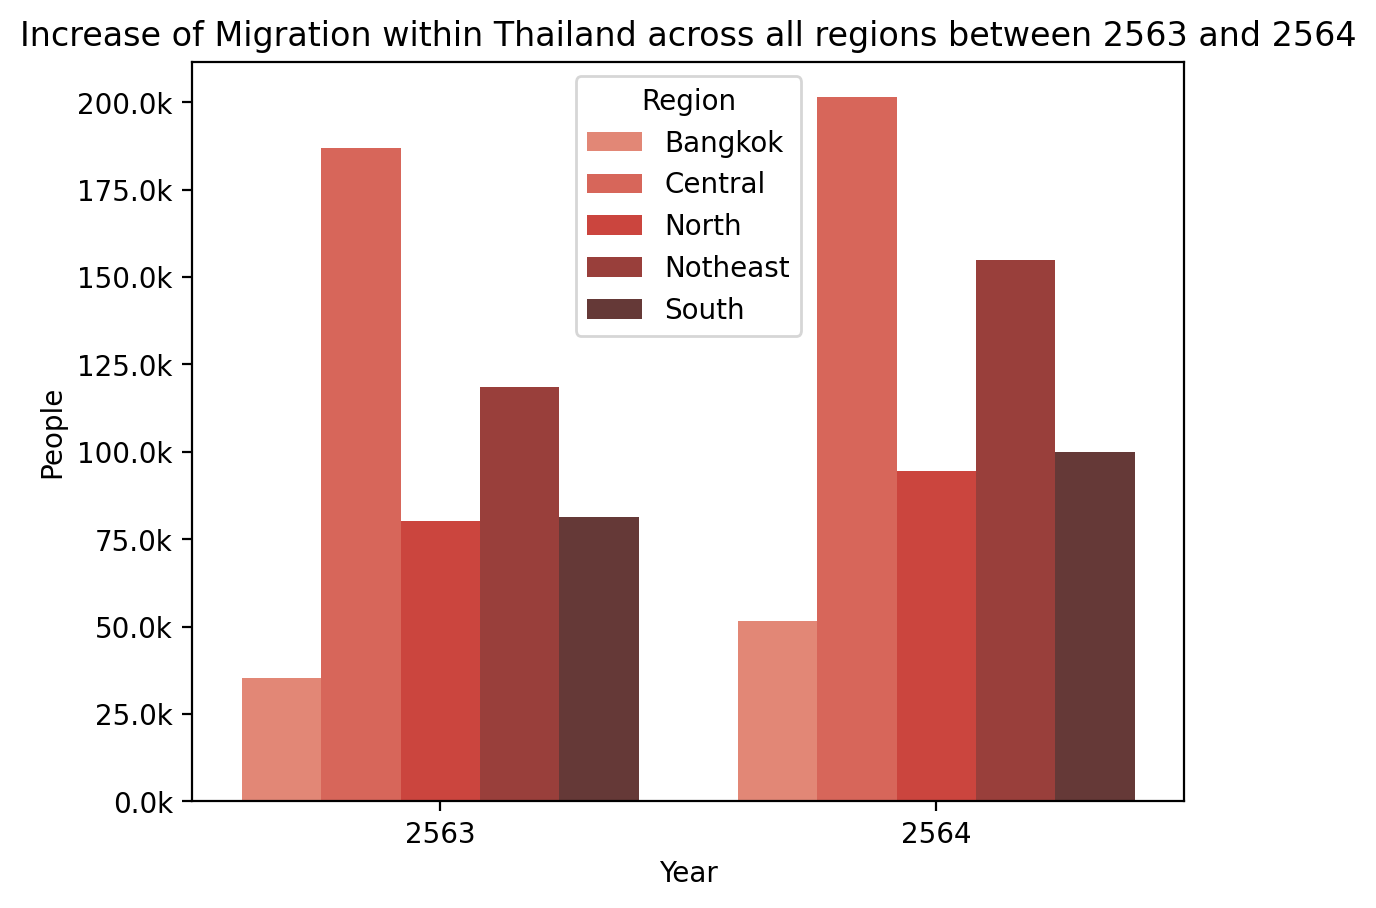

In [70]:
bargraph = sns.barplot(data=reasons_6364,
                        x="Year", 
                        y="People", 
                        errorbar=None, 
                        hue="Region", 
                        palette="Reds_d", 
                        estimator=sum)
bargraph.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x/1000:,.1f}k"))
plt.title("Increase of Migration within Thailand across all regions between 2563 and 2564")

In [71]:
regions = reasons_6364['Region'].unique()
region_dropdown = widgets.Dropdown(options=regions, description='Region:')

def update_plot(region):
    plt.figure(figsize=(8, 5)) 
    bargraph = sns.barplot(data=reasons_6364[reasons_6364['Region'] == region], 
                           y="Year", 
                           x="People", 
                           errorbar=None, 
                           color=".7")
    bargraph.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x/1000:,.1f}m"))

widgets.interact(update_plot, region=region_dropdown)

interactive(children=(Dropdown(description='Region:', options=('Bangkok', 'Central', 'North', 'Notheast', 'Sou…

<function __main__.update_plot(region)>

# [จำนวนผู้สูงอายุจากการสำรวจ จำแนกตามลักษณะการอยู่อาศัย กลุ่มอายุ เพศ](https://catalog.nso.go.th/dataset/os_01_00045/resource/c7b3b266-a884-47e1-b042-5d8eccce7d69)

In [108]:
elders = pd.read_csv("https://catalogapi.nso.go.th/api/index?table=OS_01_0045_15&format=csv", encoding='utf-8')
elders = elders[elders["year"] != 2545].copy()
elders

,year,sex,age_group,type_of_con_mat,value,unit,source
45,2550,รวม,รวม,รวม,7020959,คน,สำนักงานสถิติแห่งชาติ
46,2550,รวม,60-69 ปี,รวม,4125253,คน,สำนักงานสถิติแห่งชาติ
47,2550,รวม,70-79 ปี,รวม,2226712,คน,สำนักงานสถิติแห่งชาติ
48,2550,รวม,80 ปีขึ้นไป,รวม,668994,คน,สำนักงานสถิติแห่งชาติ
49,2550,ชาย,รวม,รวม,3130736,คน,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...
157,2564,ชาย,รวม,อยู่คนเดียว,610656,คน,สำนักงานสถิติแห่งชาติ
158,2564,หญิง,รวม,อยู่คนเดียว,990759,คน,สำนักงานสถิติแห่งชาติ
159,2564,รวม,รวม,อยู่หลายคน,11757336,คน,สำนักงานสถิติแห่งชาติ
160,2564,ชาย,รวม,อยู่หลายคน,5363366,คน,สำนักงานสถิติแห่งชาติ


In [109]:
def translate_3(val):
    if val == "รวม":
        return "All"
    elif val == "ชาย":
        return "Male"
    elif val == "หญิง":
        return "Female"
    else:
        return "Others"
def translate_4(val):
    if val == "รวม":
        return "All"
    elif val == "60-69 ปี":
        return "60-69 yrs old"
    elif val == "70-79 ปี":
        return "70-79 yrs old"
    elif val == "80 ปีขึ้นไป":
        return "80+ yrs old"
    else:
        return "Others"
def translate_5(val):
    if val == "รวม":
        return "All"
    elif val == "อยู่คนเดียว":
        return "Alone"
    elif val == "อยู่หลายคน":
        return "Not alone"
    else:
        return "Others"
    

In [110]:
elders[['sex', 'age_group','type_of_con_mat']] = elders[['sex', 'age_group','type_of_con_mat']].apply(lambda x: x.str.strip())
elders['sex'] = elders['sex'].apply(lambda x : translate_3(x))
elders['age_group'] = elders['age_group'].apply(lambda x : translate_4(x))
elders['type_of_con_mat'] = elders['type_of_con_mat'].apply(lambda x : translate_5(x))
elders = elders[(elders['type_of_con_mat'] == 'Alone') & (elders['age_group'] != 'All') & (elders['sex'] != 'All')].copy()
elders

,year,sex,age_group,type_of_con_mat,value,unit,source
62,2550,Male,60-69 yrs old,Alone,87756,คน,สำนักงานสถิติแห่งชาติ
63,2550,Male,70-79 yrs old,Alone,81477,คน,สำนักงานสถิติแห่งชาติ
64,2550,Male,80+ yrs old,Alone,21001,คน,สำนักงานสถิติแห่งชาติ
66,2550,Female,60-69 yrs old,Alone,168659,คน,สำนักงานสถิติแห่งชาติ
67,2550,Female,70-79 yrs old,Alone,132351,คน,สำนักงานสถิติแห่งชาติ
68,2550,Female,80+ yrs old,Alone,46761,คน,สำนักงานสถิติแห่งชาติ
98,2557,Male,60-69 yrs old,Alone,164865,คน,สำนักงานสถิติแห่งชาติ
99,2557,Male,70-79 yrs old,Alone,98820,คน,สำนักงานสถิติแห่งชาติ
100,2557,Male,80+ yrs old,Alone,55037,คน,สำนักงานสถิติแห่งชาติ
102,2557,Female,60-69 yrs old,Alone,266585,คน,สำนักงานสถิติแห่งชาติ


Text(0.5, 1.0, 'Elderly Lived Alone Population in Year 2550, 2557, and 2560 ')

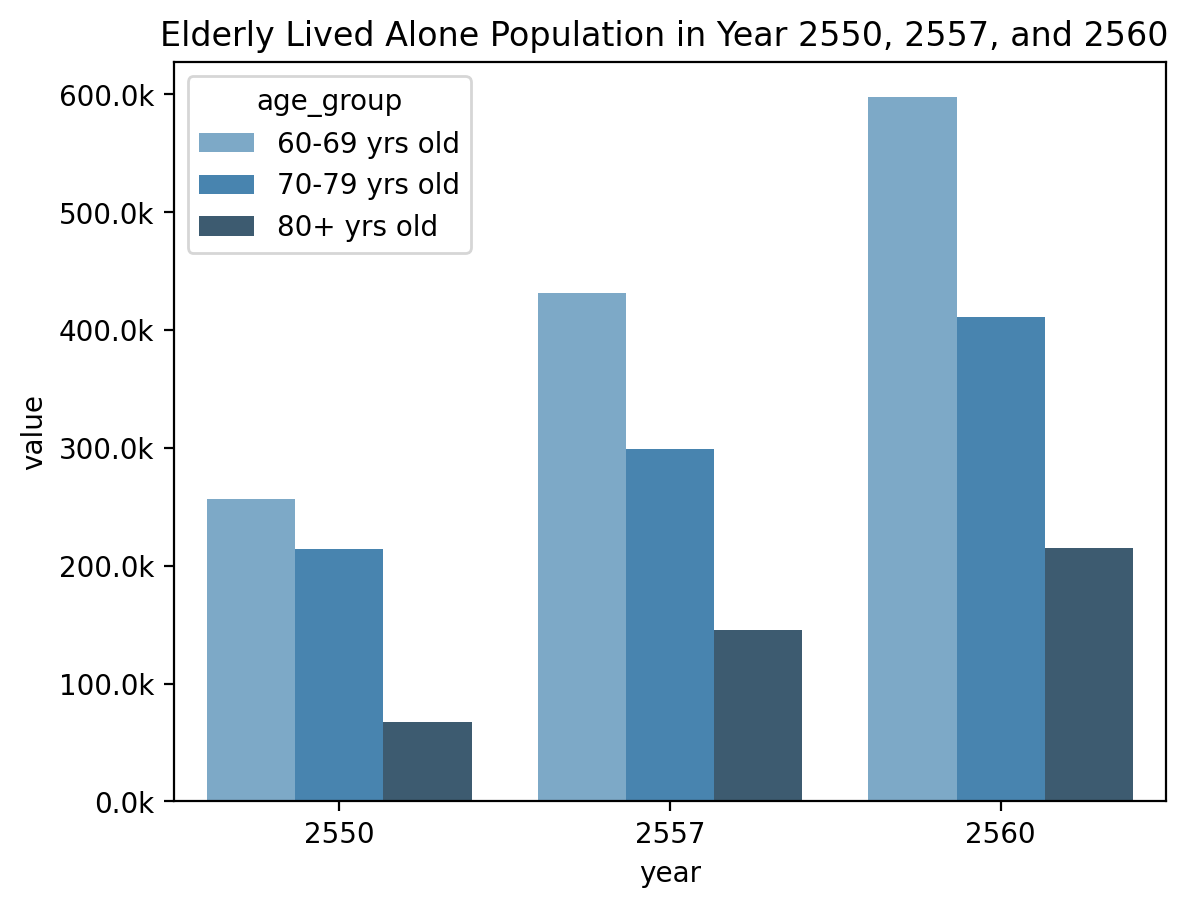

In [111]:
# make widget
grid = sns.barplot(elders, x = 'year', 
                    hue = 'age_group', 
                    y = 'value', 
                    palette='Blues_d', 
                    errorbar=None, 
                    estimator=sum)
grid.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x/1000:,.1f}k"))
plt.title("Elderly Lived Alone Population in Year 2550, 2557, and 2560 ")


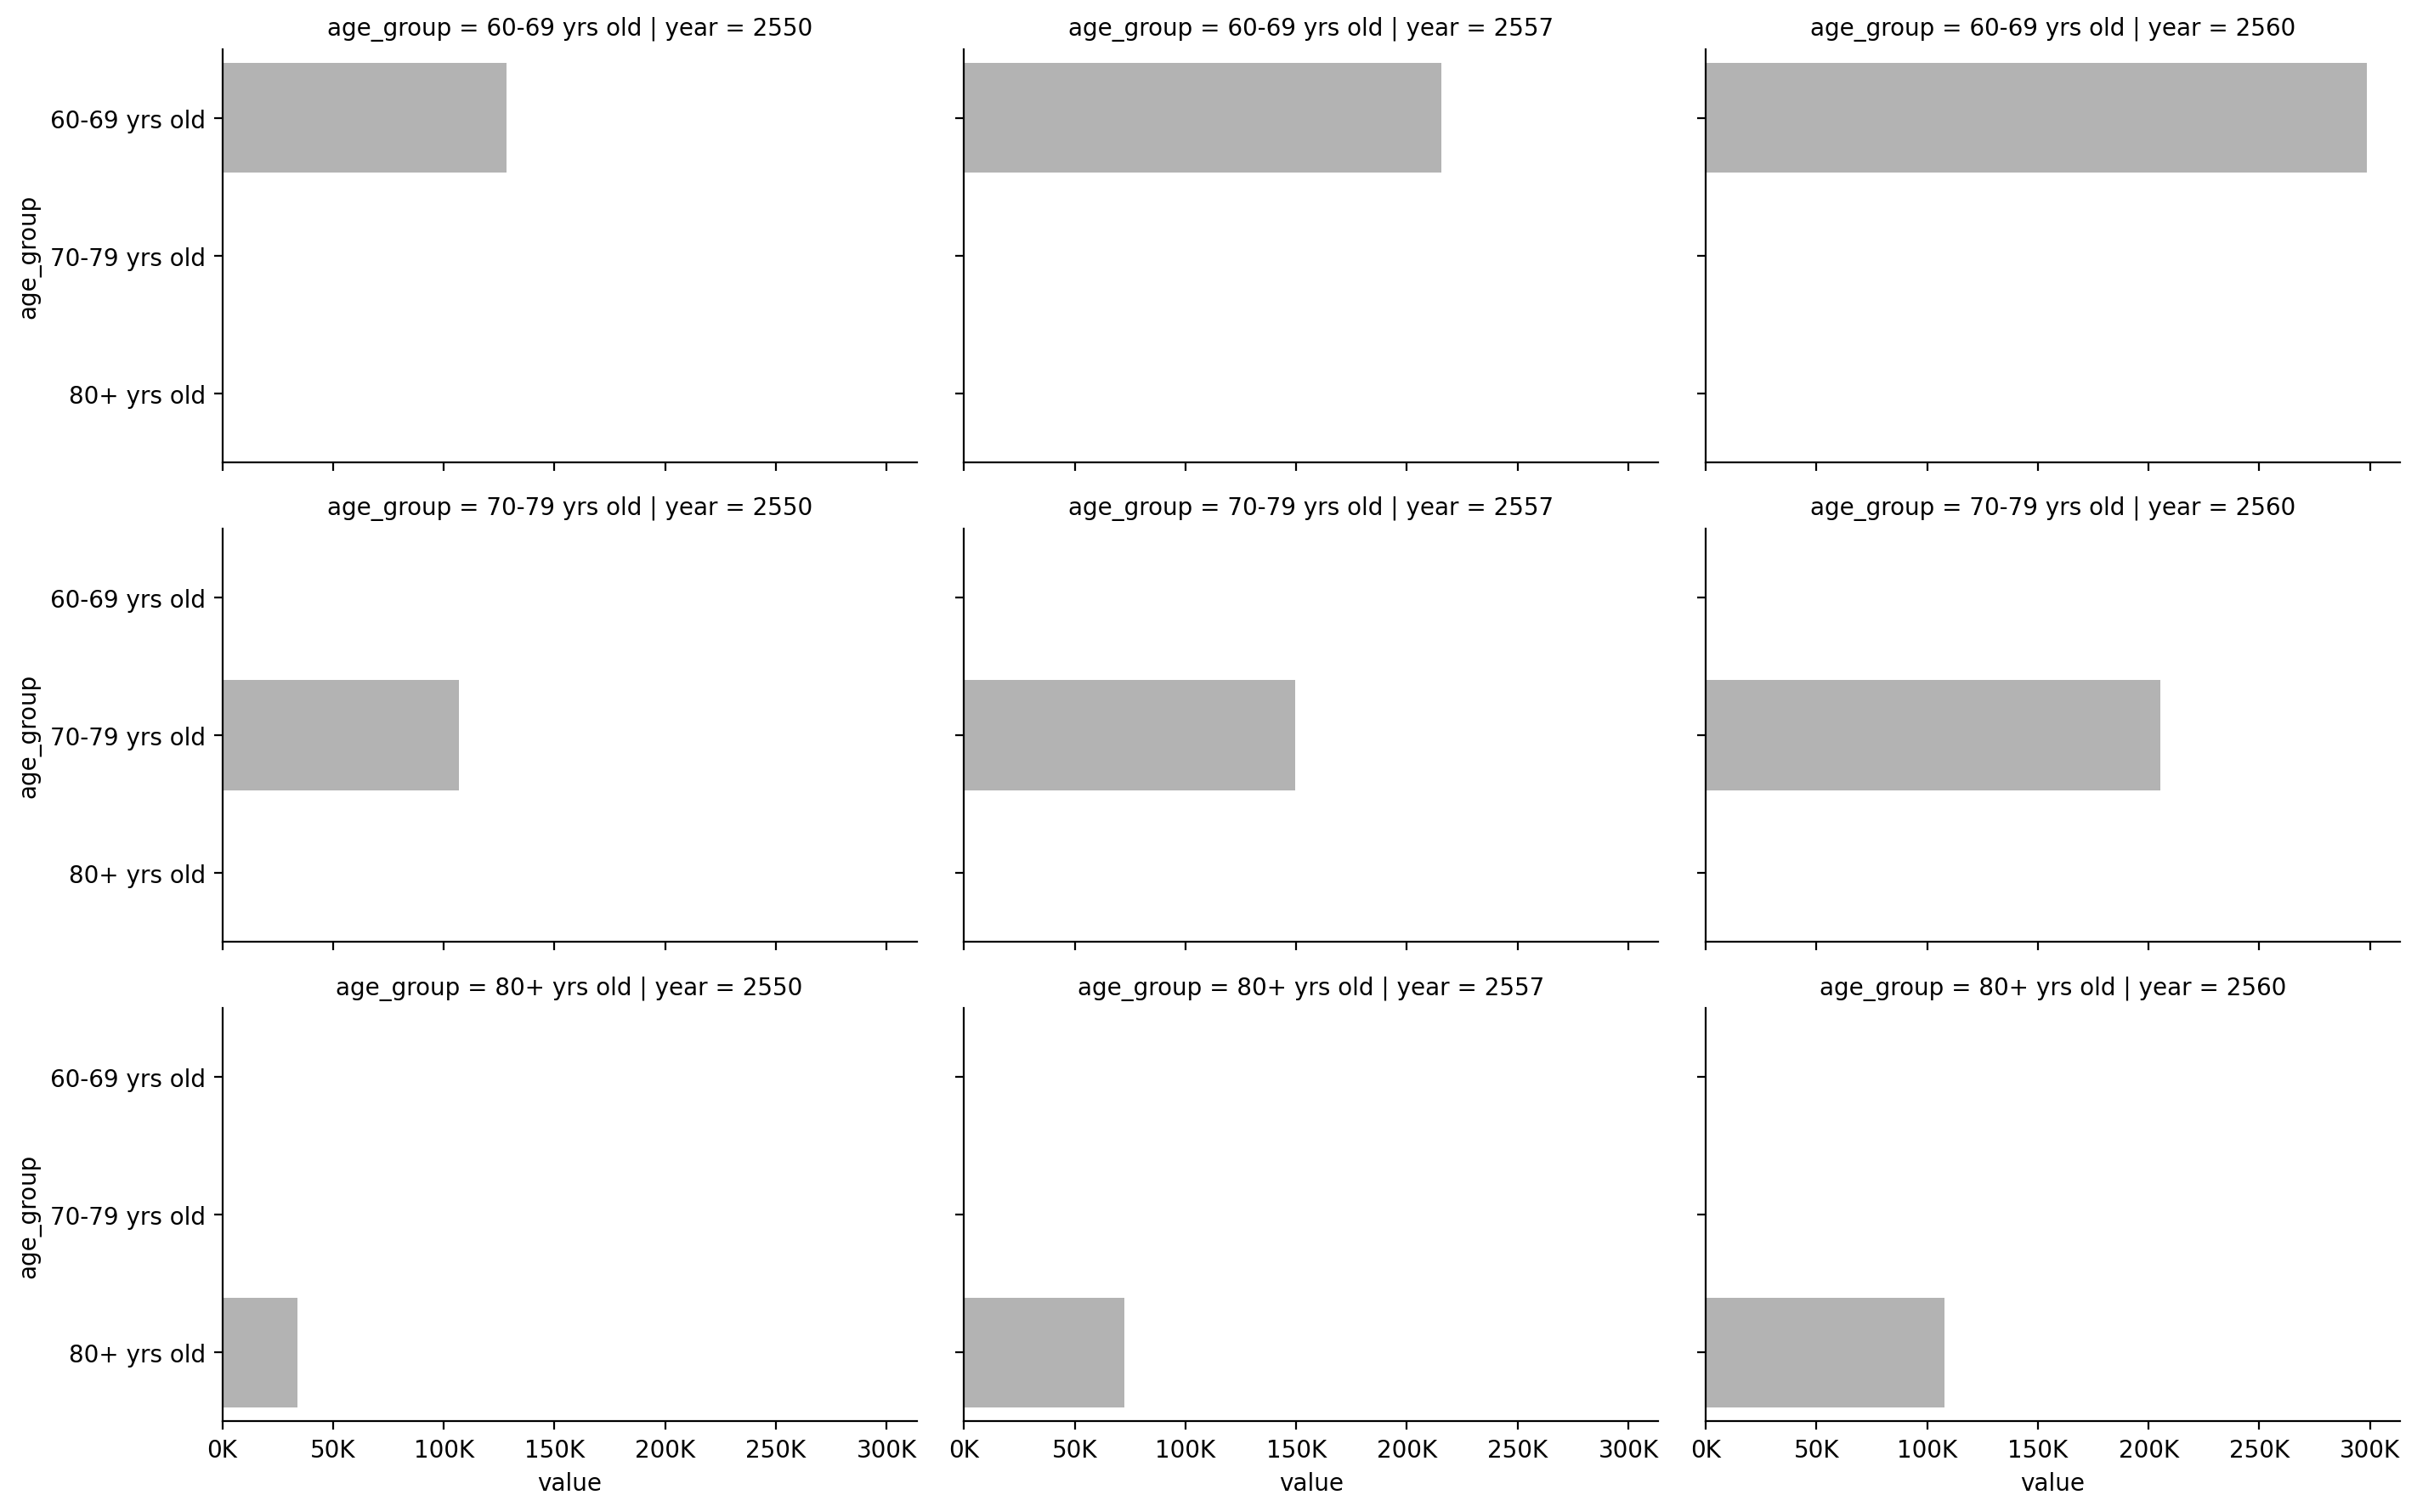

In [112]:
g = sns.catplot(
    data=elders,
    kind="bar",
    y="age_group",
    x="value",
    col="year",
    row="age_group",
    color=".7",
    height=3,
    aspect=1.6,
    sharex=True,
    errorbar=None
)

def millions_formatter(x, pos):
    return f"{x/1000:.0f}K"

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))


# ประชากรแฝงกลางคืน

In [77]:
text="""ตารางที่ 2 จำนวนประชากรแฝงในกรุงเทพ
หน่วย : พันคน 
จังหวัด,ปี,จำนวนประชากรแฝงกลางคืน
กรุงเทพมหานคร,2565,2.708
กรุงเทพมหานคร,2564,2.324
กรุงเทพมหานคร,2563,2.35
กรุงเทพมหานคร,2562,2.27
กรุงเทพมหานคร,2561,2.04
กรุงเทพมหานคร,2560,2.05
"""

In [78]:
night_pop = pd.read_csv(io.StringIO(text), skiprows=2)
night_pop.rename(columns={"จังหวัด":"City", "ปี":"Year", "จำนวนประชากรแฝงกลางคืน":"Nighttime Shadow Population"}, inplace=True)
night_pop["City"] = night_pop["City"].str.replace("กรุงเทพมหานคร", "Bangkok")
night_pop

,City,Year,Nighttime Shadow Population
0,Bangkok,2565,2.708
1,Bangkok,2564,2.324
2,Bangkok,2563,2.350
3,Bangkok,2562,2.270
4,Bangkok,2561,2.040
5,Bangkok,2560,2.050


Text(0.5, 1.0, 'Shadow Population In Bangkok')

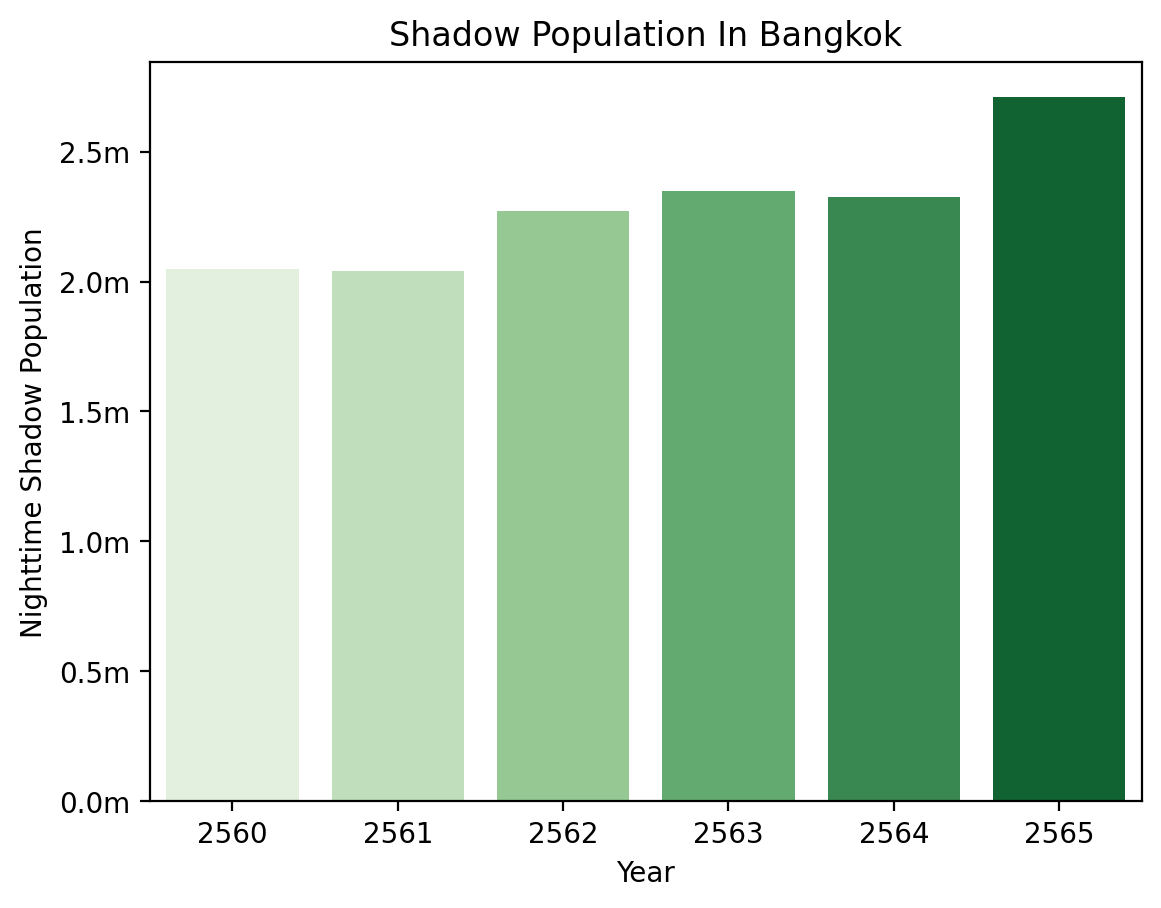

In [79]:
bargraph = sns.barplot(data=night_pop, x="Year", y="Nighttime Shadow Population", errorbar=None, palette="Greens")
bargraph.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x}m"))
plt.title("Shadow Population In Bangkok")

# อัตราเจริญพันธุ์

In [80]:
fertility = pd.read_csv('https://catalogapi.nso.go.th/api/index?table=OS_01_0038_01&format=csv')
fertility.rename(columns={"value":"percentage"}, inplace=True)
fertility

,year,percentage,unit,source
0,2517-2519,4.90,คนต่อสตรีวัยเจริญพันธุ์ (15-49 ปี) หนึ่งคน,สำนักงานสถิติแห่งชาติ
1,2528-2529,2.70,คนต่อสตรีวัยเจริญพันธุ์ (15-49 ปี) หนึ่งคน,สำนักงานสถิติแห่งชาติ
2,2538-2539,2.00,คนต่อสตรีวัยเจริญพันธุ์ (15-49 ปี) หนึ่งคน,สำนักงานสถิติแห่งชาติ
3,2548-2549,1.50,คนต่อสตรีวัยเจริญพันธุ์ (15-49 ปี) หนึ่งคน,สำนักงานสถิติแห่งชาติ
4,2558-2559,1.61,คนต่อสตรีวัยเจริญพันธุ์ (15-49 ปี) หนึ่งคน,สำนักงานสถิติแห่งชาติ


Text(0.5, 1.0, 'Fertility Rate In each Year Gap')

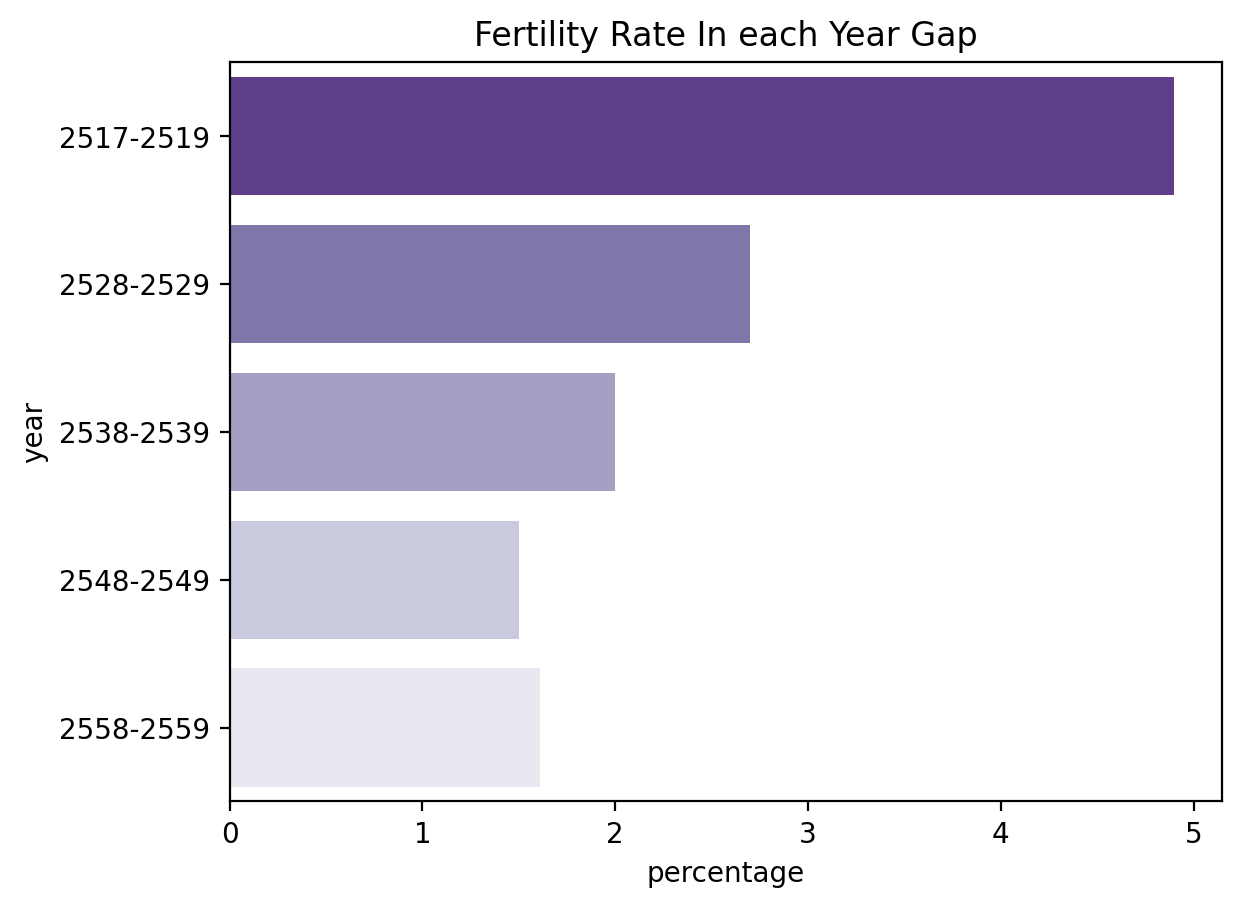

In [81]:
sns.barplot(fertility, x="percentage", y="year", palette="Purples_r")
plt.title("Fertility Rate In each Year Gap")

# Extras

In [82]:
# เปลี่ยนรูปแบบของตารางจาก wide format เป็น long format เพื่อความง่ายในการสร้างกราฟ และวิเคราะห์ข้อมูล
reasons_6364

,Immigration Reason,Year,Region,People
0,Looking for a job,2563,Bangkok,16098.0
1,Changing job,2563,Bangkok,2649.0
2,Need more revenue,2563,Bangkok,2018.0
3,Responsibility,2563,Bangkok,4064.0
4,Graduating,2563,Bangkok,497.0
...,...,...,...,...
105,Graduating,2564,South,6017.0
106,Lacking of care person,2564,South,3853.0
107,Helping family business,2564,South,133.0
108,Recovering,2564,South,377.0


In [83]:
# แยกตามภาค
# sns.catplot(reasons_6364.sort_values("People", ascending=False),
#             kind="bar",
#             y="เหตุผลของการย้ายถิ่น",
#             x="People",
#             color=".7",
#             col="Year",
#             errorbar=None,
#             palette="Reds_r",
#             height=3.5,
#             aspect=1.6,
#             sharex=True,
#             );

# Choose 1 of these 2
---
## option 1

In [153]:
@interact(Region=reasons_6364['Region'].unique())
def plot_chart(Region=reasons_6364['Region'].unique()):
    filtered_data = reasons_6364[reasons_6364['Region'] == Region]
    
    sns.catplot(
        data=filtered_data.sort_values("People", ascending=False),
        kind="bar",
        y="Immigration Reason",
        x="People",
        color=".7",
        col="Year",
        errorbar=None,
        palette="Reds_r",
        height=3.5,
        aspect=1.6,
        sharex=True,
    )

interactive(children=(Dropdown(description='Region', options=('Bangkok', 'Central', 'North', 'Notheast', 'Sout…

## option 2

In [85]:
@interact(Reason=reasons_6364['Immigration Reason'].unique())
def plot_chart(Reason=reasons_6364['Immigration Reason'].unique()):
    filtered_data = reasons_6364[reasons_6364['Immigration Reason'] == Reason]
    
    sns.catplot(
        data=filtered_data.sort_values("People", ascending=False),
        kind="bar",
        y="Region",
        x="People",
        color=".7",
        col="Year",
        errorbar=None,
        palette="Reds_r",
        height=3.5,
        aspect=1.6,
        sharex=True,
    )

interactive(children=(Dropdown(description='Reason', options=('Looking for a job', 'Changing job', 'Need more …

# 2.2.2
แต่เมื่อดูถึงเหตุผลอื่นแล้ว มีถึง 4 เหตุผลที่เกี่ยวกับหน้าที่การงาน ซึ่งรวมกันแล้วก็มีมากถึง __, __ ในปี 63, 64 ตามลำดับ

In [86]:
reasons_6364_4jobs = reasons_6364[reasons_6364["Immigration Reason"].str.contains("job|revenue|Responsibility")]
reasons_6364_4jobs

,Immigration Reason,Year,Region,People
0,Looking for a job,2563,Bangkok,16098.0
1,Changing job,2563,Bangkok,2649.0
2,Need more revenue,2563,Bangkok,2018.0
3,Responsibility,2563,Bangkok,4064.0
13,Looking for a job,2564,Bangkok,30752.0
15,Responsibility,2564,Bangkok,2707.0
16,Changing job,2564,Bangkok,1730.0
21,Need more revenue,2564,Bangkok,1312.0
22,Looking for a job,2563,Central,34475.0
23,Changing job,2563,Central,15823.0


In [87]:
pivot_reason = reasons_6364_4jobs.pivot_table(index=['Year', 'Immigration Reason'], columns='Region', values='People', margins=True, margins_name='Total', aggfunc=sum)
pivot_reason

Region                    Bangkok   Central    North  Notheast    South  \
Year  Immigration Reason                                                  
2563  Changing job         2649.0   15823.0   5193.0    6530.0   2058.0   
      Looking for a job   16098.0   34475.0   9882.0   15859.0   8642.0   
      Need more revenue    2018.0    7801.0   2879.0     535.0    197.0   
      Responsibility       4064.0   26682.0  10324.0    2552.0   7836.0   
2564  Changing job         1730.0   15664.0   5649.0    4949.0   2168.0   
      Looking for a job   30752.0   47436.0   5248.0    4504.0  10516.0   
      Need more revenue    1312.0    2478.0    421.0     117.0    354.0   
      Responsibility       2707.0   32481.0   6054.0    6766.0   7356.0   
Total                     61330.0  182840.0  45650.0   41812.0  39127.0   

Region                       Total  
Year  Immigration Reason            
2563  Changing job         32253.0  
      Looking for a job    84956.0  
      Need more revenue    13430.0  
      Responsibility       51458.0  
2564  Changing job         30160.0  
      Looking for a job    98456.0  
      Need more revenue     4682.0  
      Responsibility       55364.0  
Total                     370759.0

In [88]:
pivot_reason = pivot_reason.reset_index().copy()
pivot_reason

Region,Year,Immigration Reason,Bangkok,Central,North,Notheast,South,Total
0,2563,Changing job,2649.0,15823.0,5193.0,6530.0,2058.0,32253.0
1,2563,Looking for a job,16098.0,34475.0,9882.0,15859.0,8642.0,84956.0
2,2563,Need more revenue,2018.0,7801.0,2879.0,535.0,197.0,13430.0
3,2563,Responsibility,4064.0,26682.0,10324.0,2552.0,7836.0,51458.0
4,2564,Changing job,1730.0,15664.0,5649.0,4949.0,2168.0,30160.0
5,2564,Looking for a job,30752.0,47436.0,5248.0,4504.0,10516.0,98456.0
6,2564,Need more revenue,1312.0,2478.0,421.0,117.0,354.0,4682.0
7,2564,Responsibility,2707.0,32481.0,6054.0,6766.0,7356.0,55364.0
8,Total,,61330.0,182840.0,45650.0,41812.0,39127.0,370759.0


In [89]:
pivot_reason = pd.DataFrame(pivot_reason.groupby("Year")["Total"].sum()).copy()
pivot_reason.rename(columns={"Total":"Total of Population from work reason"})

,Total
Year,
2563,182097.0
2564,188662.0
Total,370759.0


In [140]:
reasons_6364_go_home = reasons_6364[reasons_6364["Immigration Reason"] == "Going back home"]
reasons_6364_go_home

,Immigration Reason,Year,Region,People,Color
6,Going back home,2563,Bangkok,1781.0,.7
11,Going back home,2564,Bangkok,2032.0,.7
28,Going back home,2563,Central,13067.0,.7
33,Going back home,2564,Central,15369.0,.7
50,Going back home,2563,North,23140.0,.7
55,Going back home,2564,North,31706.0,.7
72,Going back home,2563,Notheast,53217.0,.7
77,Going back home,2564,Notheast,78988.0,.7
94,Going back home,2563,South,25566.0,.7
99,Going back home,2564,South,24152.0,.7


In [142]:
pivot_reason_home = reasons_6364_go_home.pivot_table(index=['Year', 'Immigration Reason'], columns='Region', values='People', margins=True, margins_name='Total', aggfunc=sum)
pivot_reason_home

,Region,Bangkok,Central,North,Notheast,South,Total
Year,Immigration Reason,,,,,,
2563,Going back home,1781.0,13067.0,23140.0,53217.0,25566.0,116771.0
2564,Going back home,2032.0,15369.0,31706.0,78988.0,24152.0,152247.0
Total,,3813.0,28436.0,54846.0,132205.0,49718.0,269018.0


In [143]:
pivot_reason_home = pivot_reason_home.reset_index().copy()
pivot_reason_home

Region,Year,Immigration Reason,Bangkok,Central,North,Notheast,South,Total
0,2563,Going back home,1781.0,13067.0,23140.0,53217.0,25566.0,116771.0
1,2564,Going back home,2032.0,15369.0,31706.0,78988.0,24152.0,152247.0
2,Total,,3813.0,28436.0,54846.0,132205.0,49718.0,269018.0


In [144]:
pivot_reason_home = pd.DataFrame(pivot_reason_home.groupby("Year")["Total"].sum()).copy()
pivot_reason_home

,Total
Year,
2563,116771.0
2564,152247.0
Total,269018.0


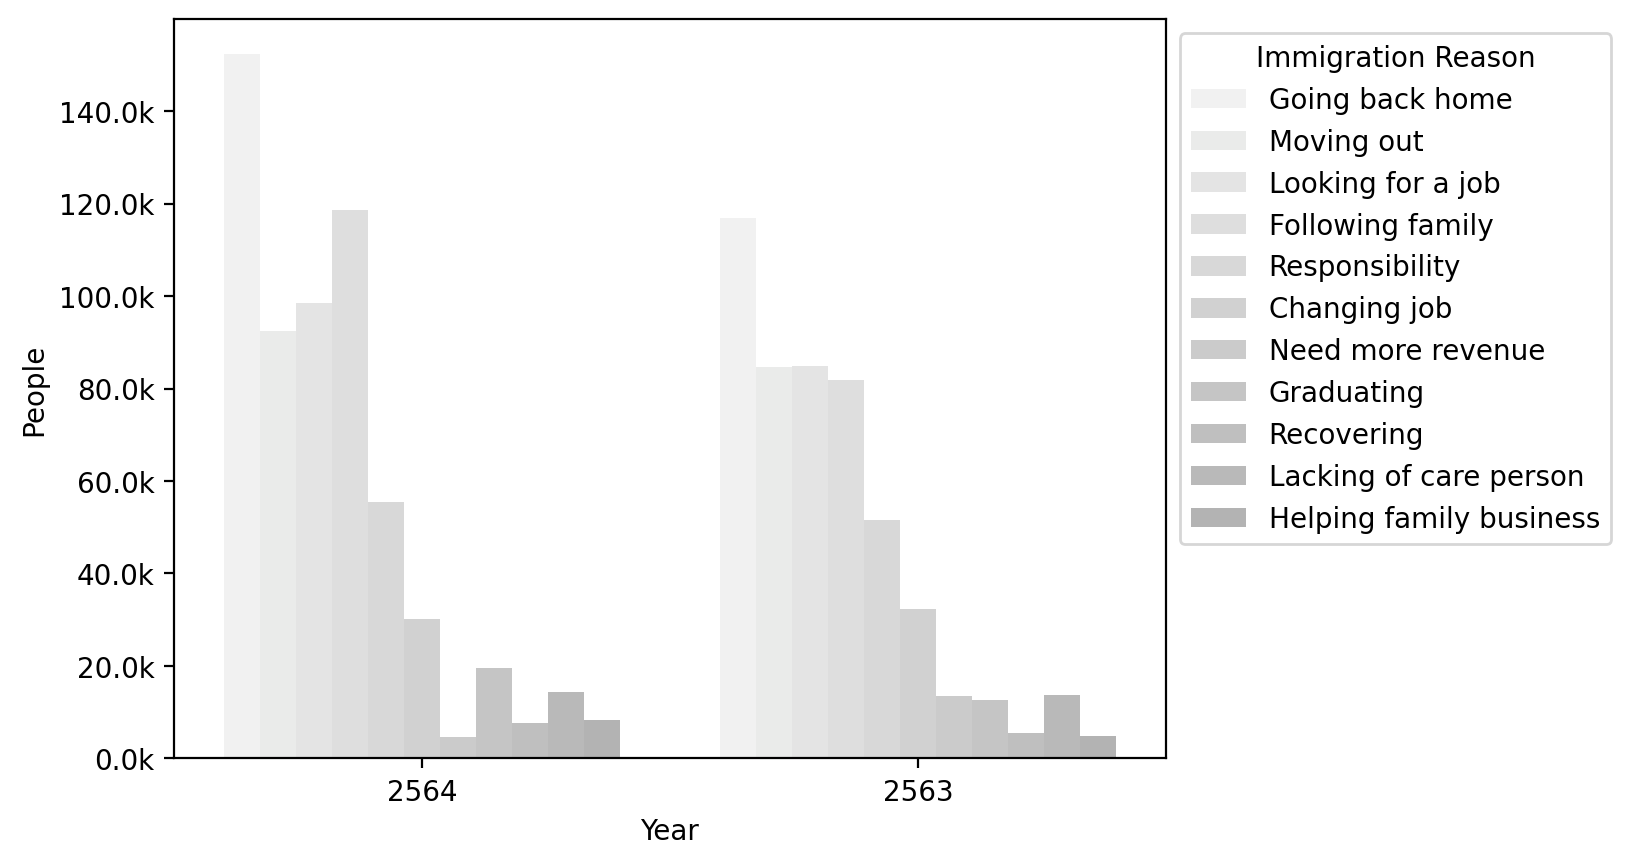

In [90]:
migrate_reason = sns.barplot(data = reasons_6364.sort_values('People', ascending=False), 
                             x="Year", 
                             y="People", 
                             hue = "Immigration Reason", 
                             errorbar=None, 
                             color=".7",
                             estimator=sum)
migrate_reason.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x/1000:,.1f}k"))
sns.move_legend(migrate_reason, "upper left", bbox_to_anchor=(1, 1))

In [131]:
sorted_reason = reasons_6364.sort_values('People', ascending=False)["Immigration Reason"].unique()
color_mapping = {
    'Looking for a job': 'red',
    'Responsibility': 'red',
    'Changing job': 'red',
    'Need more revenue': 'red'
}

colored_reasons = ['red' if reason in color_mapping else '.8' for reason in sorted_reason]
    

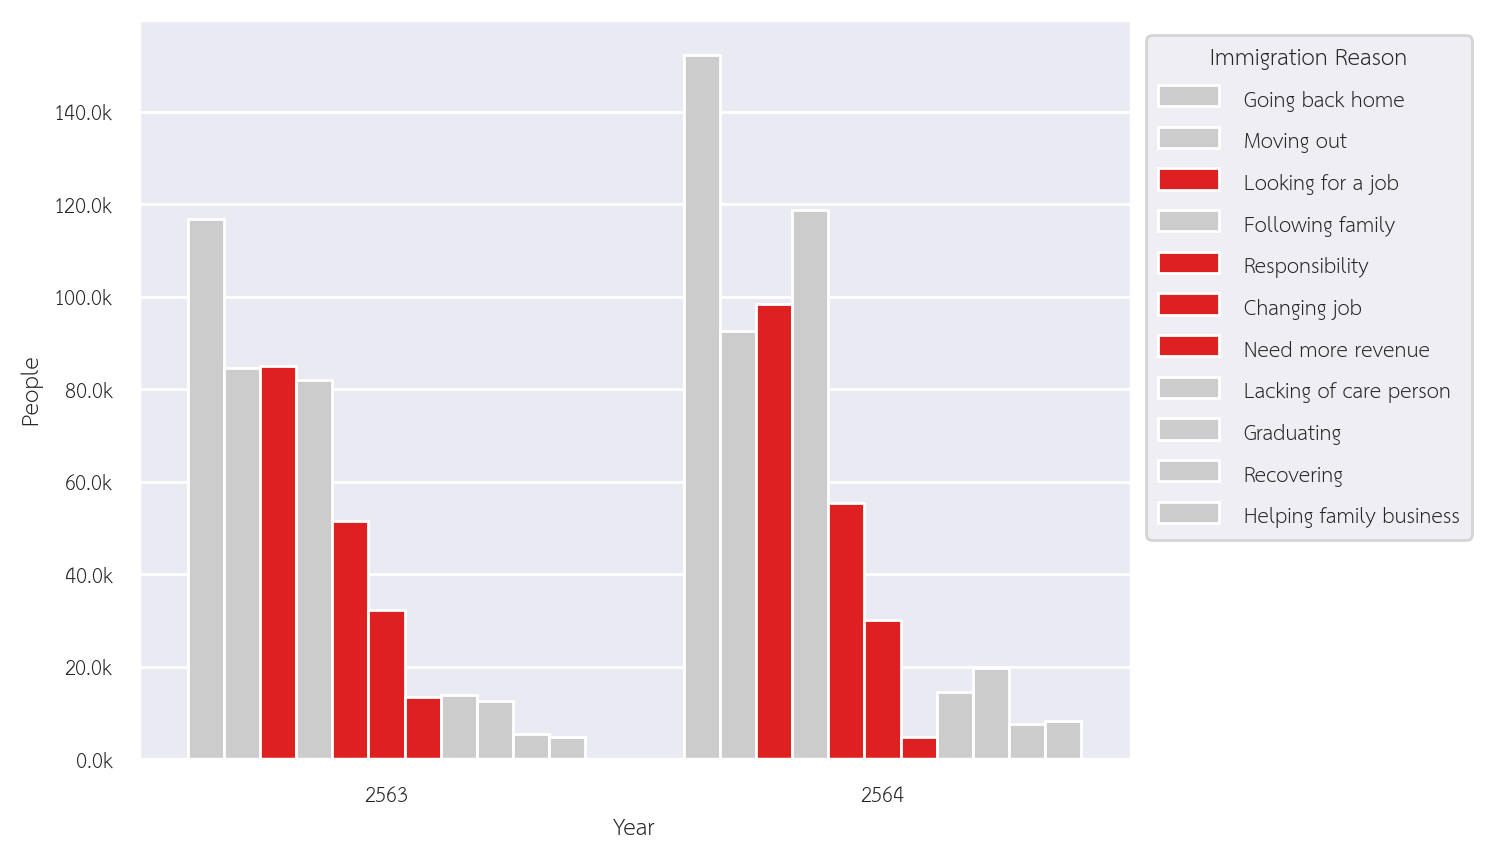

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm

# plt.rcParams['font.family'] = 'TH Sarabun New'

font_url = "https://github.com/bluenex/baansuan_prannok/raw/master/fonts/sukhumvit-set/SukhumvitSet-Medium.ttf"

# Download the font file
response = requests.get(font_url)
with open("sukhumvit_set.ttf", "wb") as f:
    f.write(response.content)

# Register the font with Matplotlib
prop = fm.FontProperties(fname="sukhumvit_set.ttf")

# Set font properties for the plot
sns.set_theme(font=prop.get_family())


# sns.set_theme(font='Sukhumvit Set')
migrate_reason = sns.barplot(data=reasons_6364.sort_values(['Year', 'People'], ascending=[True, False]),
                             x="Year",
                             y="People",
                             hue="Immigration Reason",
                             palette = colored_reasons,
                             errorbar=None,
                             estimator=sum,
                            #  order=
                             )

# Format y-axis labels
migrate_reason.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x/1000:,.1f}k"))

# Move the legend to the upper left outside the plot
sns.move_legend(migrate_reason, "upper left", bbox_to_anchor=(1, 1))
